In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv(r'D:\Dig\binary.csv')
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [13]:
X=data[['gre','gpa','rank']]
y=data['admit']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
X_test.shape

(80, 3)

In [18]:
X_train.shape

(320, 3)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
model.predict_proba(X_test)

array([[0.77958674, 0.22041326],
       [0.65508042, 0.34491958],
       [0.77590254, 0.22409746],
       [0.57415043, 0.42584957],
       [0.79217219, 0.20782781],
       [0.47991545, 0.52008455],
       [0.46255259, 0.53744741],
       [0.73228825, 0.26771175],
       [0.49358579, 0.50641421],
       [0.78562593, 0.21437407],
       [0.8619964 , 0.1380036 ],
       [0.52784569, 0.47215431],
       [0.32807009, 0.67192991],
       [0.55529491, 0.44470509],
       [0.54816297, 0.45183703],
       [0.66248981, 0.33751019],
       [0.35222174, 0.64777826],
       [0.54020047, 0.45979953],
       [0.68932518, 0.31067482],
       [0.57767195, 0.42232805],
       [0.64704628, 0.35295372],
       [0.79002223, 0.20997777],
       [0.60007178, 0.39992822],
       [0.79958896, 0.20041104],
       [0.569699  , 0.430301  ],
       [0.70157753, 0.29842247],
       [0.64276924, 0.35723076],
       [0.5232338 , 0.4767662 ],
       [0.53442843, 0.46557157],
       [0.53200292, 0.46799708],
       [0.

In [26]:
model.predict([[700,4.00,2]])

array([0], dtype=int64)

In [27]:
model.score(X_test,y_test)

0.6875

In [29]:
model.predict([[850,3.50,3]])

array([0], dtype=int64)

In [30]:
model.predict([[850,3.50,1]])

array([1], dtype=int64)

In [31]:
model.predict([[850,5.50,3]])

array([0], dtype=int64)

Text(0, 0.5, 'Number of students')

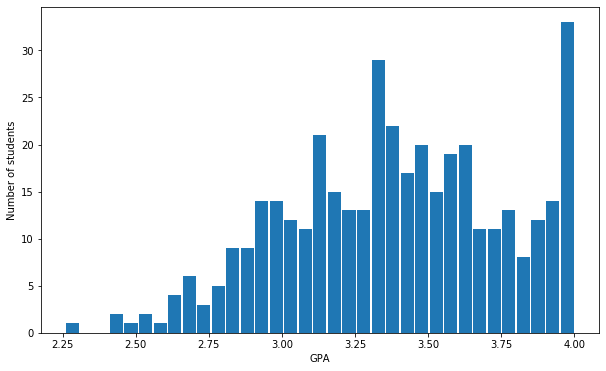

In [36]:
#   data visualization
plt.figure(figsize=(10,6))
plt.hist(data['gpa'],rwidth=0.9,bins=35)
plt.xlabel("GPA")
plt.ylabel("Number of students")

Text(0.5, 0, 'GPA')

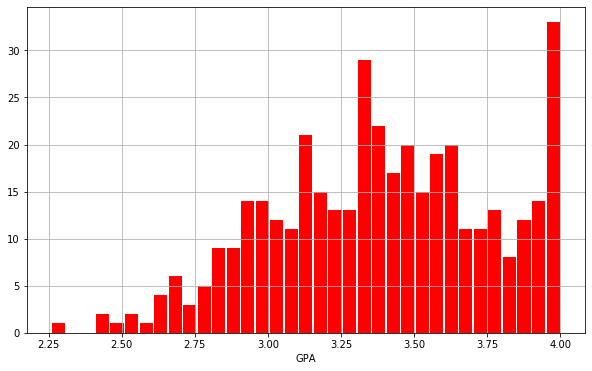

In [40]:
#same thing we can do like that too
plt.figure(figsize=(10,6))
data['gpa'].hist(bins=35,color='red',rwidth=0.9)
plt.xlabel('GPA')

Text(0, 0.5, 'Number of students')

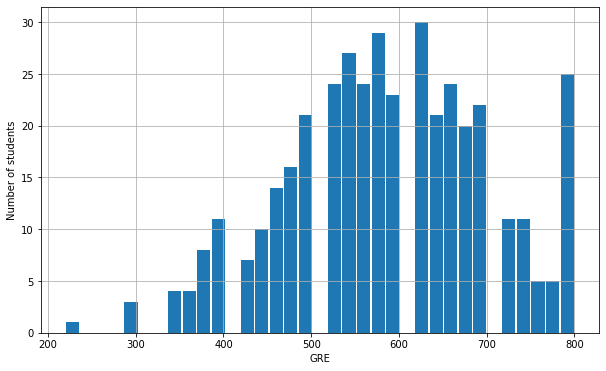

In [43]:
plt.figure(figsize=(10,6))
data['gre'].hist(bins=35,rwidth=0.9)
plt.xlabel("GRE")
plt.ylabel("Number of students")

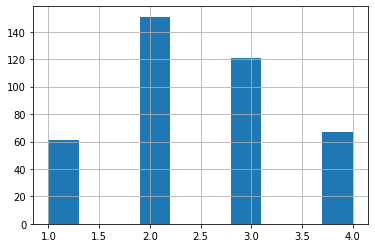

In [46]:
data['rank'].hist(rwidth=1)

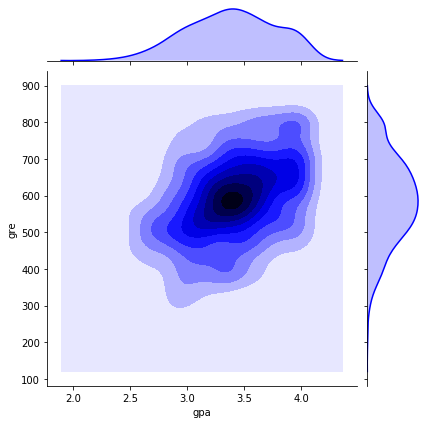

In [47]:
sns.jointplot(x='gpa',y='gre',data=data,color='blue',kind='kde')

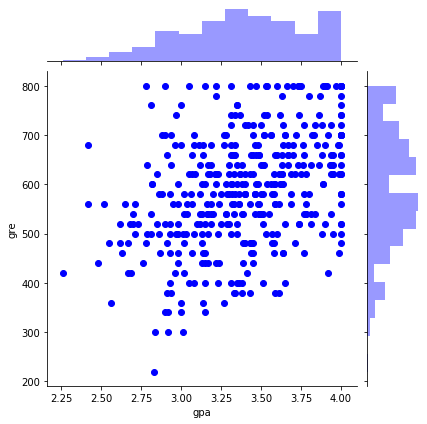

In [48]:
sns.jointplot(x='gpa',y='gre',data=data,color='blue')

In [72]:
dummies=pd.get_dummies(data['rank'],prefix='Rank')
dummies.head(2)

,Rank_1,Rank_2,Rank_3,Rank_4
0,0,0,1,0
1,0,0,1,0


In [50]:
cols_we_need=['admit','gre','gpa']

In [53]:
df=data[cols_we_need].join(dummies.ix[:,'Rank_2':])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [54]:
df.head()

,admit,gre,gpa,Rank_2,Rank_3,Rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [55]:
from sklearn.model_selection import train_test_split
X=df[['gre','gpa','Rank_2','Rank_3','Rank_4']]
y=df['admit']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [58]:
X_test.shape

(120, 5)

In [59]:
X_train.shape

(280, 5)

In [60]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [61]:
model2.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
pred = model2.predict(X_test)

In [64]:
#this classification_report will tell us the presition,recall and F1 score values for our logistic regression model
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))   #takes actual and predicited value

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        81
           1       0.50      0.10      0.17        39

    accuracy                           0.68       120
   macro avg       0.59      0.53      0.48       120
weighted avg       0.63      0.68      0.59       120



In [65]:
model2.score(X_test,y_test)

0.675

In [71]:
model2.predict([[850,5.2,0,0,0]])

array([1], dtype=int64)

In [ ]:
#percision is the ability of the classifier not ot label as +ve a sample that is -ve,&
#recall is the ability of the classifier to find all the +ve samples.